In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
from enspara import ra
from enspara import msm

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
from enspara import msm
import numpy as np

In [3]:
import networkx as nx
import scipy

## Some custom functions

In [4]:
plt.rcParams['axes.linewidth'] = 2
def plot_fig(
        xs, ys, ax=None, label=None, color='black', bar=False, norm_ys=False, alpha=1.0,
        figsize=(12,5), **kwargs):
    if norm_ys:
        ys = int_norm(xs, ys)
    if ax is None:
        pfig = plt.figure(figsize=figsize)
        ax = plt.subplot(
            111, **kwargs) #ylabel='probability', xlabel='FRET E', title='Res 182-241')
        for item in (
                [ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(16)
        ax.tick_params(direction='out', length=10, width=3, colors='black')
    else:
        pfig = ax.figure
    if bar:
        width = (xs[1] - xs[0])
    if label is None:
        if bar:
            plt.bar(xs, ys, color=color, width=width, edgecolor='black', alpha=alpha)
        else:
            plt.plot(xs, ys, color=color, linewidth=3)
    else:
        if bar:
            plt.bar(
                xs, ys, color=color, label=label, width=width,
                edgecolor='black', alpha=alpha)
        else:
            plt.plot(
                xs, ys, label=label,
                color=color, linewidth=3)
        plt.legend(loc=2, prop={'size': 18})
    return pfig, ax

In [16]:
def sample_gaussian(xs, A, B, sigma):
    ys = A/(sigma*np.sqrt(2*np.pi)) * np.exp((-0.5*((xs-B)/sigma)**2))
    #ys = A * np.exp((-(1/2)*((xs-B)/sigma)**2))
    return ys

def project_msm(
        data, populations=None, x_range=None, n_points=1000, sigma=None):
    """projects MSM onto an order parameter
    
    Inputs
    ----------
    data : nd.array, shape=(n_states, )
        The value of the order parameter for each cluster center.
    populations : nd.array, shape=(n_states, )
        The population of each state from the MSM.
    x_range : array, shape=(2, ), default=None,
        The x-axis plot range. i.e. [1, 5].
    n_points : int, default=1000,
        Number of points to use for plotting data.
    sigma : float, default=None,
        The width to use for each gaussian. If none is supplied, defaults to
        1/20th of the `x_range`.
    
    Outputs
    ----------
    xs : nd.array, shape=(n_points, ),
        The x-axis values of the resultant projection.
    ys : nd.array, shape=(n_points, )
        The y-axis values of the resultant projection.
    """
    data_spread = data.max() - data.min()
    if populations is None:
        populations = np.ones(data.shape[0])/data.shape[0]
    if x_range is None:
        delta_0p1 = data_spread*0.1
        x_range = [data.min()-delta_0p1, data.max()+delta_0p1]
    if sigma is None:
        sigma = data_spread/20.
    range_spread = x_range[1] - x_range[0]
    xs = range_spread*(np.arange(n_points)/n_points) + x_range[0]
    ys = np.zeros(xs.shape[0])
    for n in np.arange(data.shape[0]):
        ys += sample_gaussian(xs, populations[n], data[n], sigma=sigma)
    return xs, ys

## Upload assignments distances

In [6]:
assignments = ra.load("./data-10000/assignments.h5")

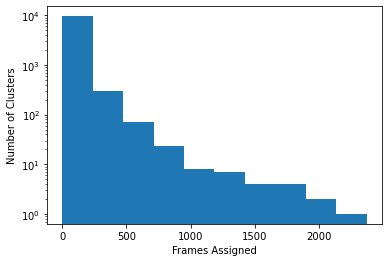

In [7]:
plt.hist(np.bincount(assignments.flatten()))
plt.ylabel('Number of Clusters')
plt.xlabel('Frames Assigned')
plt.yscale('log')

In [8]:
dists = ra.load('./data-10000/distances.h5')

Text(0.5, 0, 'Distance to Cluster Center')

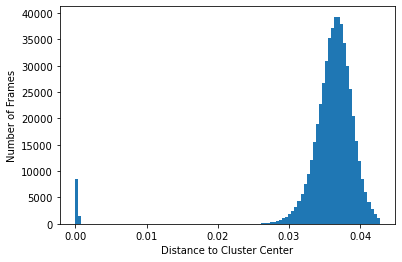

In [9]:
plt.hist(dists.flatten(), bins=100)
plt.ylabel('Number of Frames')
plt.xlabel('Distance to Cluster Center')

In [6]:
eq_probs = np.load("./data-10000/populations.npy")

Text(0, 0.5, 'Log(States)')

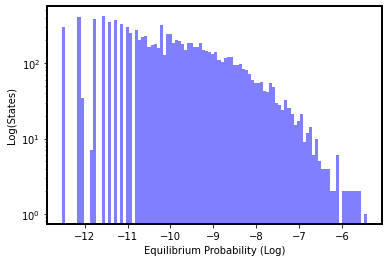

In [9]:
plt.hist(np.log(eq_probs), bins =100, log=True, facecolor='blue', alpha=0.5)

plt.xlabel("Equilibrium Probability (Log)")
plt.ylabel("Log(States)")

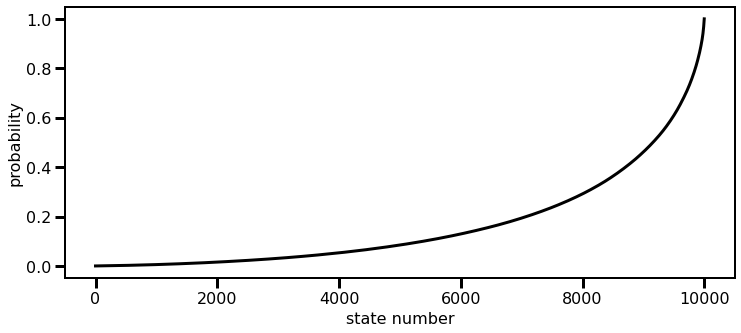

In [14]:
ylabel = 'probability'
xlabel = 'state number'
plot_fig(np.arange(
    eq_probs.shape[0]), np.cumsum(np.sort(eq_probs)), xlabel=xlabel, ylabel=ylabel)
plt.show()

In [13]:
ls

build_msm.py          data-3000/       sse-1381423.log  sso-1386321.log
centers_masses-3000/  data-4000/       sse-1383099.log  sso-1386332.log
centers_masses-4000/  plumed.dat       sse-1386321.log  submission.sh
Clustering-MSM.ipynb  prot0.pdb        sse-1386332.log  trajectories/
COLVAR-3000           prot_masses.pdb  sso-1381423.log
COLVAR-4000           save_states.py   sso-1383099.log


### Uploading COLVAR

In [10]:
# DIST1
d1=np.loadtxt(f"COLVAR-10000-min", comments="#")[:, 1]
# DIST3
d2=np.loadtxt(f"COLVAR-10000-min", comments="#")[:, 2]
# Tyr -Trp
d3=np.loadtxt(f"COLVAR-10000-min", comments="#")[:, 3]
# Tyr-Asp
d4=np.loadtxt(f"COLVAR-10000-min", comments="#")[:, 8]
# Chi1 Tyr79
chi1=np.loadtxt(f"COLVAR-10000-min", comments="#")[:, 6]
chi2=np.loadtxt(f"COLVAR-10000-min", comments="#")[:, 7]

In [11]:
fes=np.log(eq_probs)

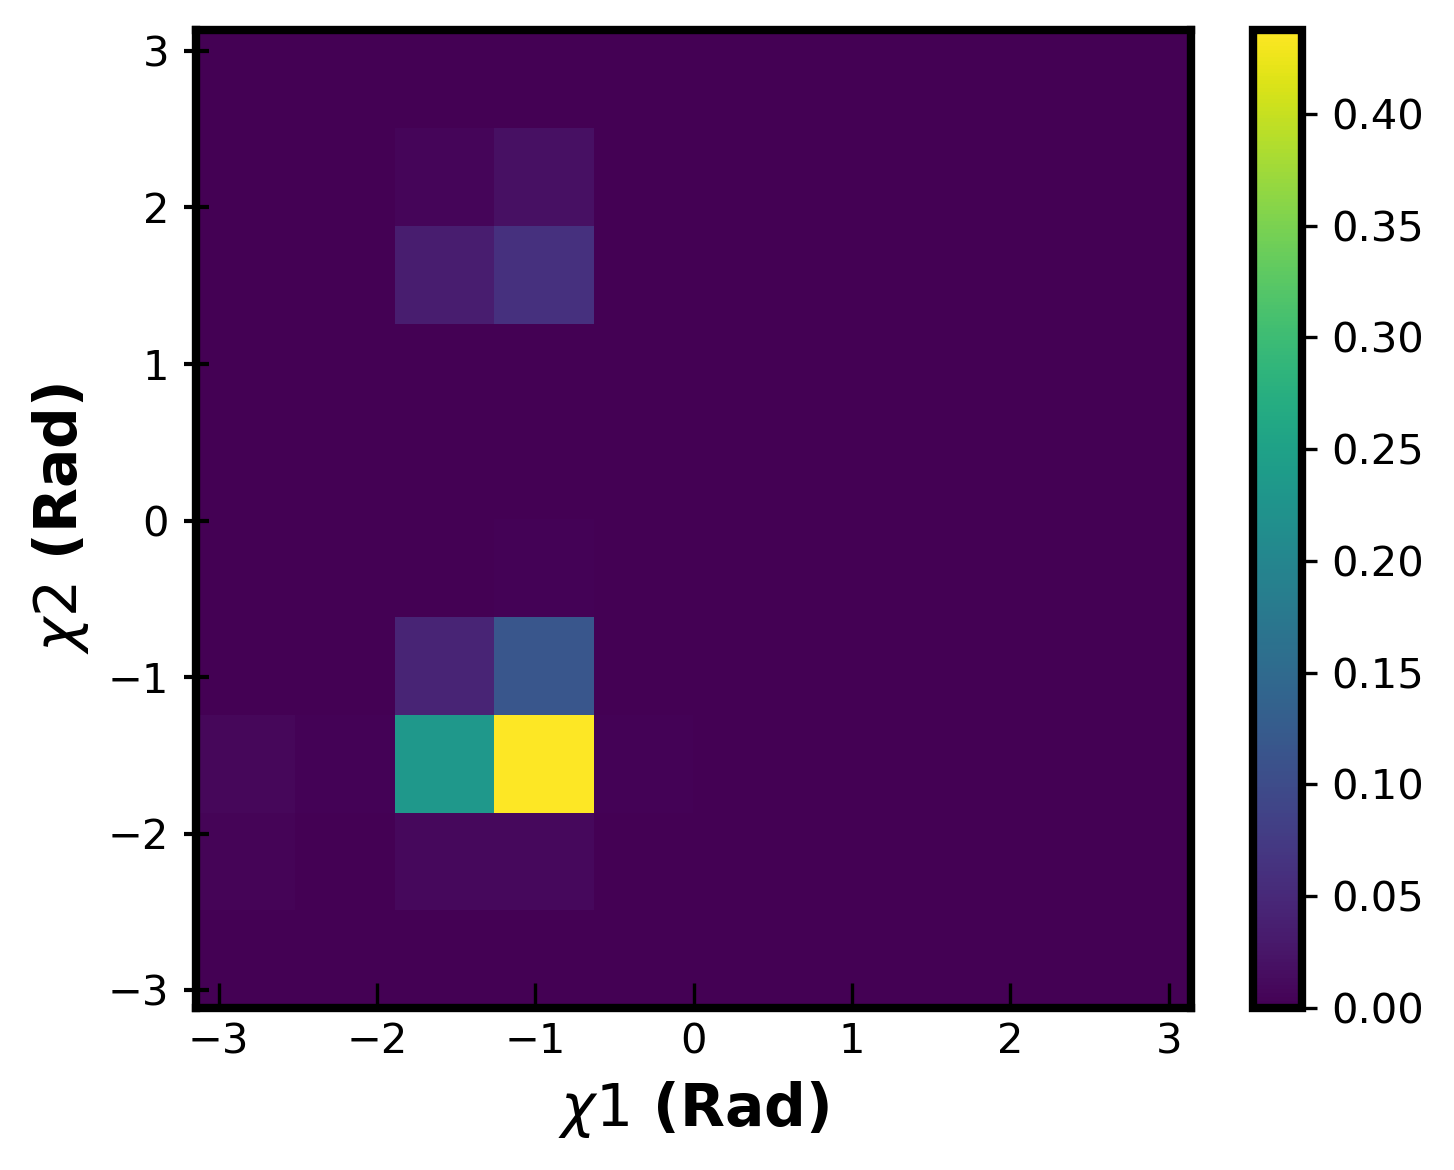

In [13]:
fig = plt.figure(figsize = (5,4), dpi = 300)
gs = matplotlib.gridspec.GridSpec(1,1)

ax1 = fig.add_subplot(gs[0],label = 'C307')
im = ax1.hist2d(chi1,chi2,weights = eq_probs)
ax = [ax1]
for a in ax:
    a.legend(frameon = False)
    a.set_ylabel("$\chi2$ (Rad)", size = 14, fontweight = 'bold')
    a.set_xlabel("$\chi1$ (Rad)", size = 14, fontweight = 'bold')
    a.tick_params(labelsize=10, axis = 'both')
    a.tick_params(reset = True, axis = 'x', which = 'both', direction = 'in', color = 'k', top = False)
    a.tick_params(axis = 'x', which = 'major', length = 6)
    a.tick_params(axis = 'x', which = 'minor', length = 3)
    a.tick_params(reset = True, axis = 'y', width =1., length = 6, which = 'both', direction = 'inout', color = 'k', right = False)
fig.colorbar(im[3], ax=ax1, orientation='vertical')
plt.tight_layout()

In [ ]:
plt.plot(X,Y)
plt.show()

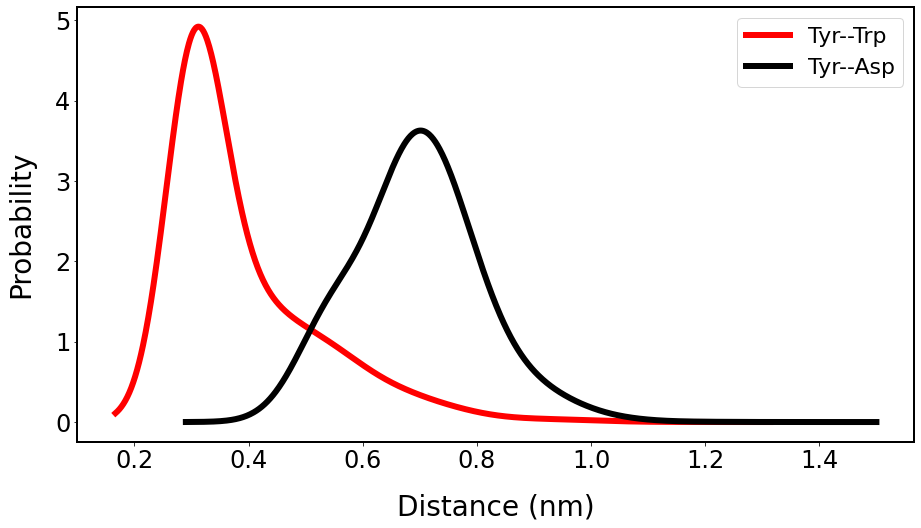

In [17]:
xs, ys = project_msm(d3, eq_probs)
xw, yw = project_msm(d4, eq_probs)
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,8))
lw=6
plt.plot(xs, ys, linewidth=lw, color="red", label = "Tyr--Trp")
plt.plot(xw, yw, linewidth=lw, color="black", label = "Tyr--Asp")
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Distance (nm)',fontsize=28,labelpad=20)
plt.ylabel('Probability',fontsize=28,labelpad=20)
plt.legend()
plt.show()

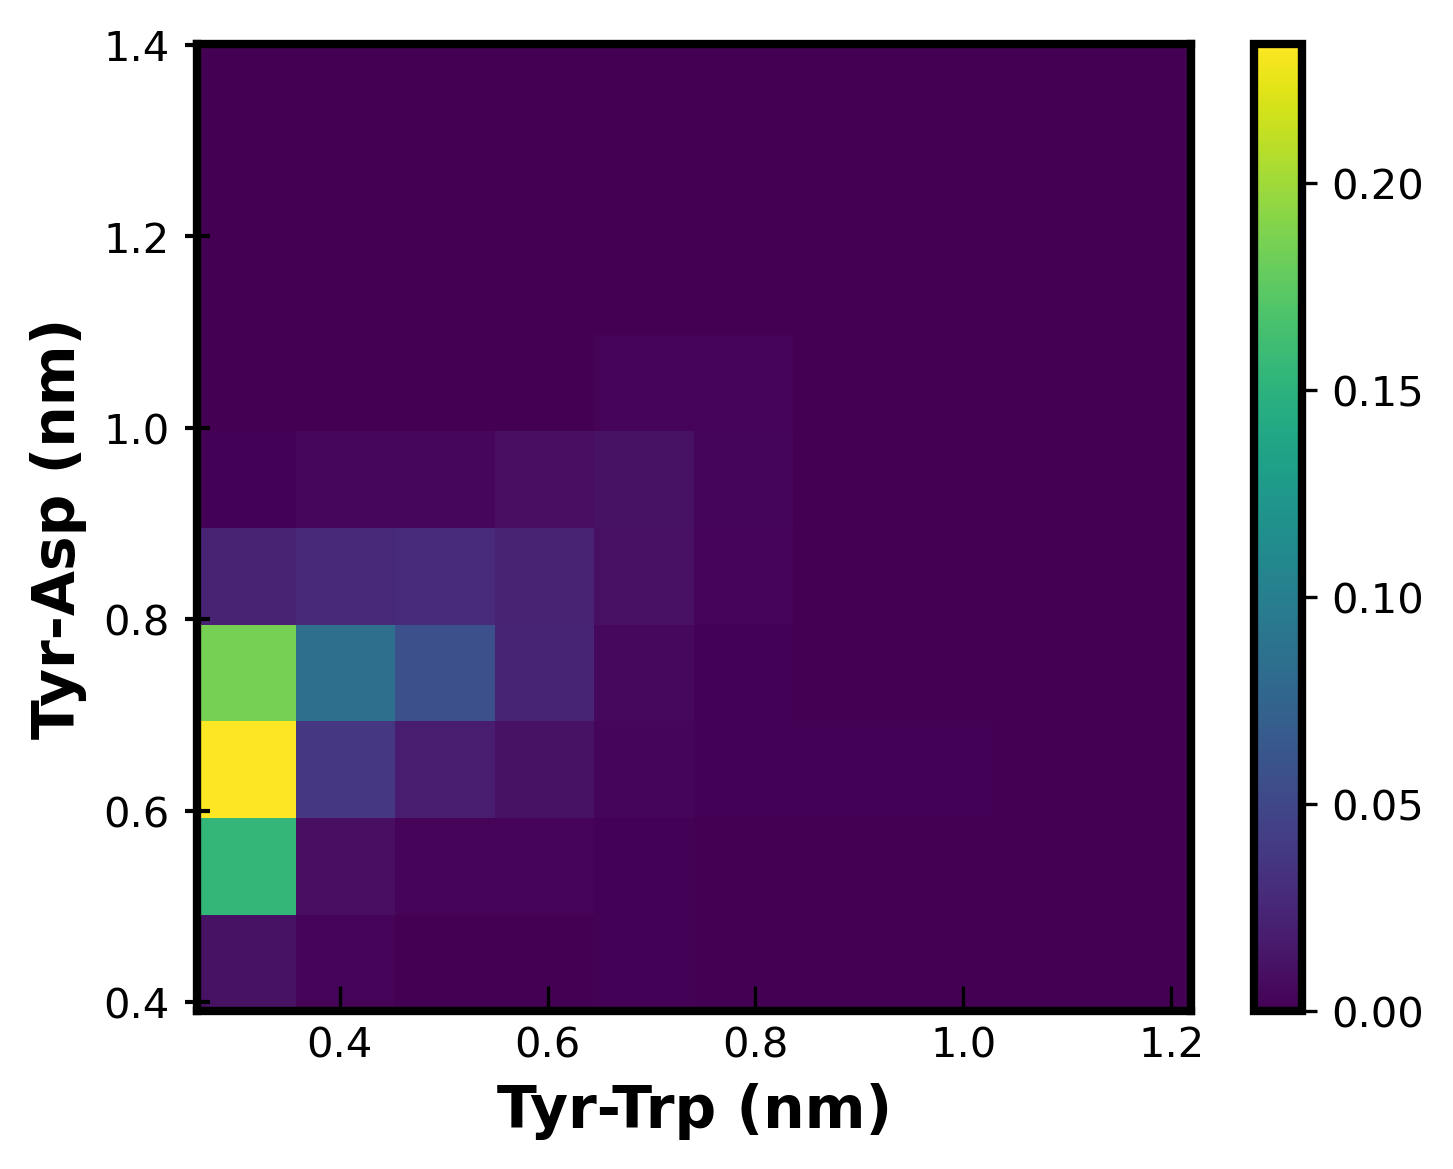

In [14]:
fig = plt.figure(figsize = (5,4), dpi = 300)
gs = matplotlib.gridspec.GridSpec(1,1)

ax1 = fig.add_subplot(gs[0],label = 'C307')
im = ax1.hist2d(d3,d4,weights = eq_probs)
ax = [ax1]
for a in ax:
    a.legend(frameon = False)
    a.set_ylabel("Tyr-Asp (nm)", size = 14, fontweight = 'bold')
    a.set_xlabel("Tyr-Trp (nm)", size = 14, fontweight = 'bold')
    a.tick_params(labelsize=10, axis = 'both')
    a.tick_params(reset = True, axis = 'x', which = 'both', direction = 'in', color = 'k', top = False)
    a.tick_params(axis = 'x', which = 'major', length = 6)
    a.tick_params(axis = 'x', which = 'minor', length = 3)
    a.tick_params(reset = True, axis = 'y', width =1., length = 6, which = 'both', direction = 'inout', color = 'k', right = False)
fig.colorbar(im[3], ax=ax1, orientation='vertical')
plt.tight_layout()

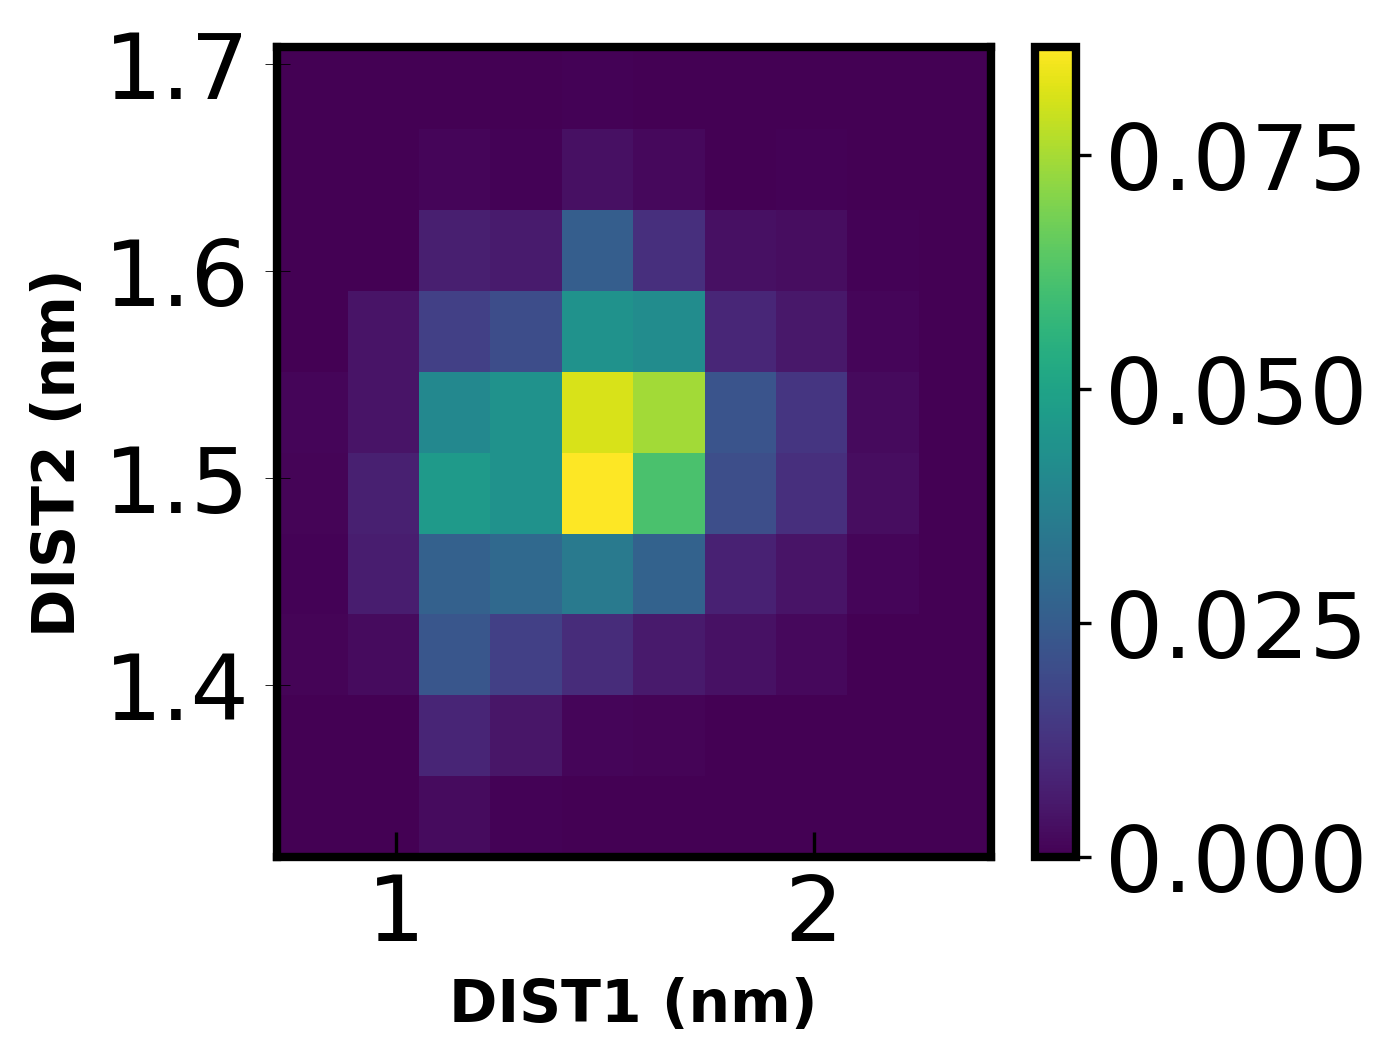

In [23]:
fig = plt.figure(figsize = (5,4), dpi = 300)
gs = matplotlib.gridspec.GridSpec(1,1)

ax1 = fig.add_subplot(gs[0],label = 'C307')
im = ax1.hist2d(d1,d2,weights = eq_probs)
ax = [ax1]
for a in ax:
    a.legend(frameon = False)
    a.set_ylabel("DIST2 (nm)", size = 14, fontweight = 'bold')
    a.set_xlabel("DIST1 (nm)", size = 14, fontweight = 'bold')
    a.tick_params(labelsize=10, axis = 'both')
    a.tick_params(reset = True, axis = 'x', which = 'both', direction = 'in', color = 'k', top = False)
    a.tick_params(axis = 'x', which = 'major', length = 6)
    a.tick_params(axis = 'x', which = 'minor', length = 3)
    a.tick_params(reset = True, axis = 'y', width =0.2, length = 6, which = 'both', direction = 'inout', color = 'k', right = False)
fig.colorbar(im[3], ax=ax1, orientation='vertical')
plt.tight_layout()

In [45]:
n_states = 20
population_df = pd.DataFrame()
population_df['population'] = np.sort(xs)[::-1]
population_df['state'] = np.argsort(xs)[::-1]
cm = sns.light_palette("green", as_cmap=True)
population_df.loc[:n_states].style.background_gradient(
    cmap=cm, subset=(population_df.index[:n_states], population_df.select_dtypes(float).columns))

,population,state
0,1.308395,999
1,1.307258,998
2,1.306120,997
3,1.304983,996
4,1.303845,995
5,1.302708,994
6,1.301570,993
7,1.300433,992
8,1.299295,991
9,1.298158,990


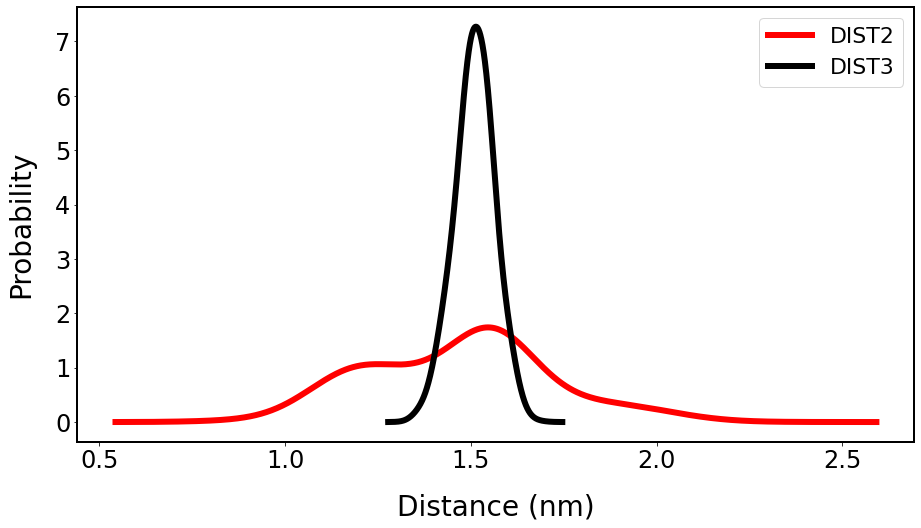

In [33]:
xs, ys = project_msm(d1, eq_probs)
xw, yw = project_msm(d2, eq_probs)
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,8))
lw=6
plt.plot(xs, ys, linewidth=lw, color="red", label = "DIST2")
plt.plot(xw, yw, linewidth=lw, color="black", label = "DIST3")
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Distance (nm)',fontsize=28,labelpad=20)
plt.ylabel('Probability',fontsize=28,labelpad=20)
plt.legend()
plt.show()

## Get the states

In [53]:
n_states = 4000
population_df = pd.DataFrame()
population_df['DIST2'] = np.sort(xs)[::-1]
population_df['States'] = np.argsort(ys)[::-1]
cm = sns.light_palette("green", as_cmap=True)
population_df.loc[:n_states].style.background_gradient(
    cmap=cm, subset=(population_df.index[:n_states], population_df.select_dtypes(float).columns))

,DIST2,States
0,2.565453,494
1,2.563437,493
2,2.561421,495
3,2.559404,492
4,2.557388,496
5,2.555372,491
6,2.553355,497
7,2.551339,490
8,2.549323,498
9,2.547306,489


In [34]:
import pandas as pd
import seaborn as sns

In [42]:
n_states = 4000
population_df = pd.DataFrame()
population_df['population'] = np.sort(eq_probs)
population_df['state'] = np.argsort(eq_probs)
cm = sns.light_palette("green", as_cmap=True)
population_df.loc[:n_states].style.background_gradient(
    cmap=cm, subset=(population_df.index[:n_states], population_df.select_dtypes(float).columns))

In [41]:
n_states = 20
population_df = pd.DataFrame()
population_df['population'] = np.sort(xs)[::-1]
population_df['state'] = np.argsort(xs)[::-1]
cm = sns.light_palette("green", as_cmap=True)
population_df.loc[:n_states].style.background_gradient(
    cmap=cm, subset=(population_df.index[:n_states], population_df.select_dtypes(float).columns))

,population,state
0,1.308395,999
1,1.307258,998
2,1.306120,997
3,1.304983,996
4,1.303845,995
5,1.302708,994
6,1.301570,993
7,1.300433,992
8,1.299295,991
9,1.298158,990
